In [1]:
from PIL import Image, ImageDraw, ImageFont, ImageOps
import string
from matplotlib import pyplot as plt


In [2]:
asciis = list(filter(lambda a: a.isprintable(), string.printable))
asciis = "".join(asciis)

asciis

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ '

In [3]:
fnt = ImageFont.truetype("fonts/CascadiaMono.ttf", 12)
bbox = fnt.getbbox(asciis)
width, height = bbox[2], bbox[3]
letter_width = width / len(asciis)

print(bbox)
print(width, height)
print(letter_width)
print(height / letter_width)

(0, 1, 665, 15)
665 15
7.0
2.142857142857143


In [4]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))
img

In [5]:
for i in range(0, len(asciis)):
    img_d.line([(i * letter_width, 0), (i * letter_width, height)], fill=255, width=1)

img

In [6]:
img_d.line([(0, height//2), (width, height//2)], fill=255, width=1)

img

In [7]:
img = Image.new(mode="L", size=(width, height), color=(0))
img_d = ImageDraw.Draw(img)

img_d.text((0,0), asciis, font=fnt, fill=(255))

img

(73, 1)
0.7684210526315789


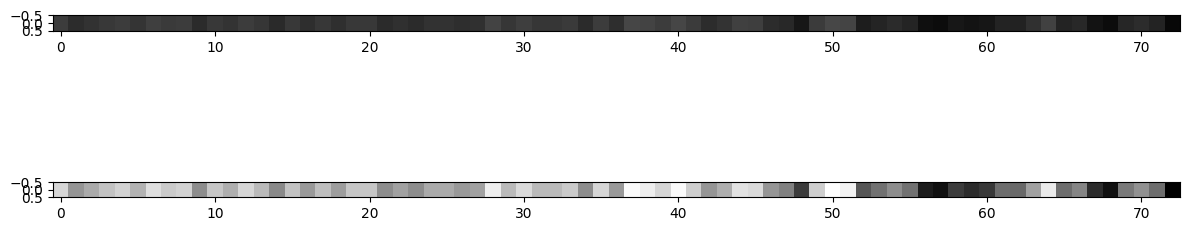

In [8]:
scale = 1/9
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(221, 5)
2.3263157894736843


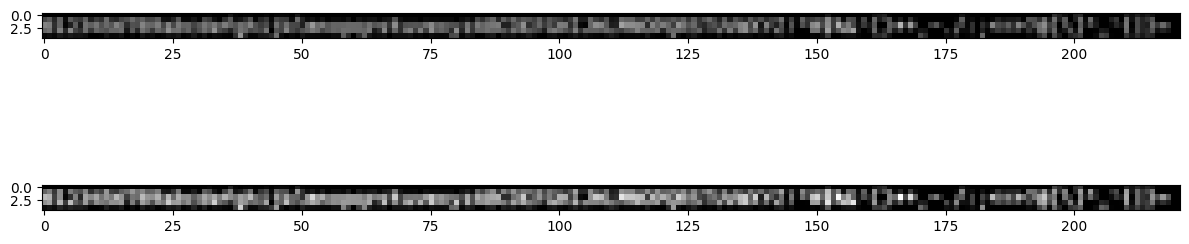

In [9]:
scale = 1/3
resized_box = (int(img.width * scale), int(img.height * scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

(147, 6)
1.5473684210526315


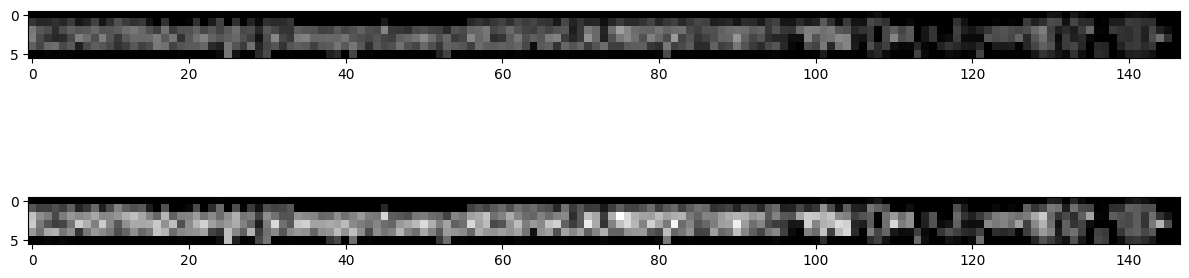

In [10]:
w_scale = 2/9
h_scale = 8/19
resized_box = (int(img.width * w_scale), int(img.height * h_scale))
print(resized_box)
print(resized_box[0] / len(asciis))
resized_img = img.resize(resized_box)
fig, axs = plt.subplots(nrows=2, figsize=(12, 8), layout='tight')
axs[0].imshow(resized_img, interpolation='nearest', cmap='gray', vmin=0, vmax=255)
axs[1].imshow(ImageOps.autocontrast(resized_img), interpolation='nearest', cmap='gray', vmin=0, vmax=255)

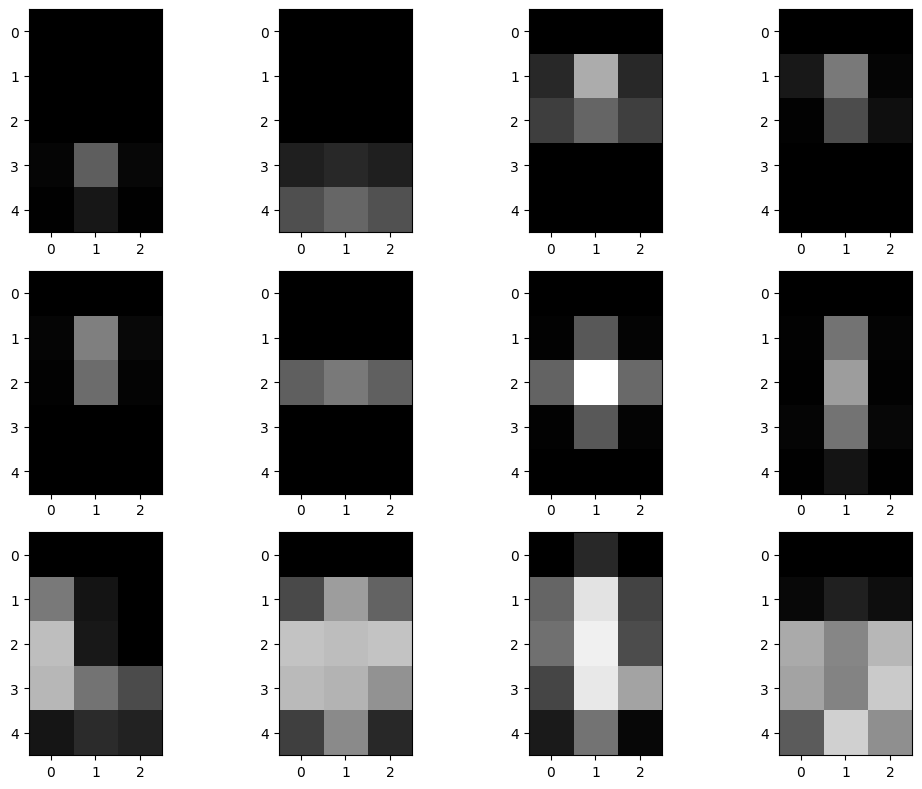

In [11]:
from generate_ascii_palette import generate_brightness_map

char_set = "._^`'-+!L@$g"
brightness_map = generate_brightness_map(char_set, fnt, (3,5), normalize=True)
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(12, 8), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)


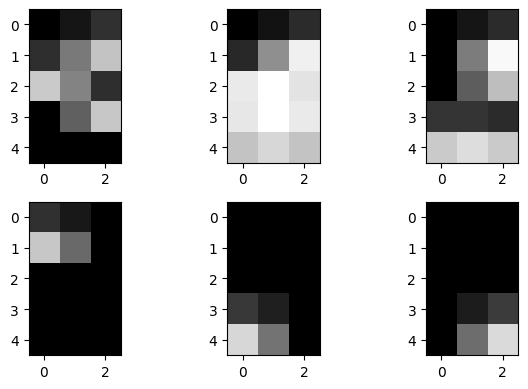

In [12]:
char_set = "⠪⣾⣘⠁⡀⢀"
brightness_map = generate_brightness_map(char_set, fnt, (3,5), normalize=True)
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)


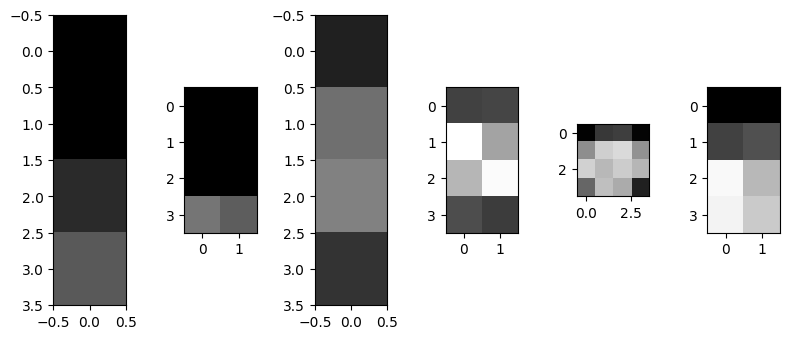

In [13]:
from generate_ascii_palette import generate_non_mono_brightness_map
fnt_non_mono = ImageFont.truetype("fonts/OpenSans-Regular.ttf", 12)
char_set = "._/$@g"
brightness_map = generate_non_mono_brightness_map(char_set, fnt_non_mono, 4, 4, normalize=True)
fig, axs = plt.subplots(ncols=6, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i%axs.shape[0]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)

14
dict_keys(['@', '.g', 'g.', '.$', '$.', '/_', '_/', '._', '_.', '//', '../', './.', '/..', '...'])


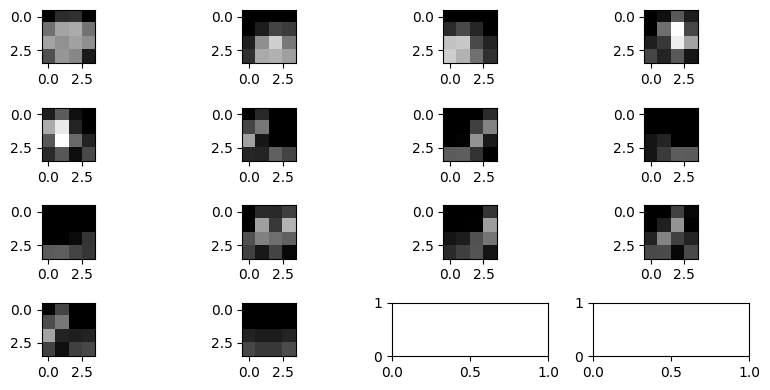

In [14]:
from generate_ascii_palette import generate_non_mono_multi_char_brightness_map

fnt_non_mono = ImageFont.truetype("fonts/OpenSans-Regular.ttf", 12)
char_set = "._/$@g"
brightness_map = generate_non_mono_multi_char_brightness_map(char_set, fnt_non_mono, 4, 4, normalize=True)
print(len(brightness_map))
print(brightness_map.keys())
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(8, 4), layout='tight')
for i, b in enumerate(brightness_map.values()):
    axs[i//axs.shape[1]][i%axs.shape[1]].imshow(b, interpolation='nearest', cmap='gray', vmin=0, vmax=1)

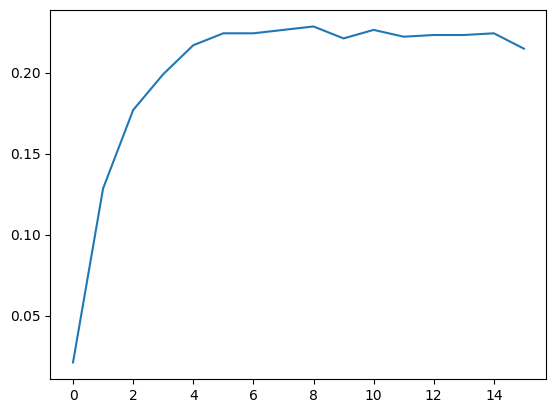

final no noise 0.9263157894736842
final 0.2044736842105263


In [15]:
from sklearn.neural_network import MLPClassifier
from sklearn.utils import shuffle
from sklearn.base import clone
from copy import deepcopy
import numpy as np
from IPython.display import clear_output
brightness_map = generate_brightness_map(asciis, fnt, (2,4), normalize=True)
classes = list(brightness_map.keys())
brightness_X = np.array([b.flatten() for b in brightness_map.values()])
brightness_y = list(brightness_map.keys())

repetitions = 50
train_X = np.tile(brightness_X, (repetitions,1))
train_y = list(brightness_map.keys()) * repetitions

noise = 0.6
test_X = deepcopy(train_X)
test_y = deepcopy(train_y)
test_X += ((np.random.random(test_X.shape)-0.5) * noise)
test_X = np.clip(test_X, a_min=0, a_max=1)

val_X = test_X[:len(test_X) // 5]
val_y = test_y[:len(test_y) // 5]
test_X = test_X[len(test_X) // 5:]
test_y = test_y[len(test_y) // 5:]

cls = MLPClassifier(hidden_layer_sizes=(50,))
scores = []
for i in range(151):
    new_train_X = deepcopy(train_X)
    new_train_y = deepcopy(train_y)
    
    new_train_X += ((np.random.random(new_train_X.shape)-0.5) * noise)
    new_train_X = np.clip(new_train_X, a_min=0, a_max=1)
    new_train_X, new_train_y = shuffle(new_train_X, new_train_y)
    cls.partial_fit(new_train_X, new_train_y, classes)
    if i % 10 == 0:
        scores.append(cls.score(val_X, val_y))
        clear_output()
        plt.plot(scores)
        plt.show()
    

print('final no noise', cls.score(brightness_X, brightness_y))
print('final', cls.score(test_X, test_y))



In [16]:
from ascii_art_conversion_mlp import train_classifier

brightness_shape = (2,4)
noise = 0.2
cls, char_to_brightness_map = train_classifier(asciis, fnt, brightness_shape, (20), 100, noise)

brightness_X = np.array([b.flatten() for b in brightness_map.values()])
brightness_y = list(brightness_map.keys())

repetitions = 50
train_X = np.tile(brightness_X, (repetitions,1))
train_y = list(brightness_map.keys()) * repetitions

test_X = deepcopy(train_X)
test_y = deepcopy(train_y)
test_X += ((np.random.random(test_X.shape)-0.5) * noise)
test_X = np.clip(test_X, a_min=0, a_max=1)

print('final no noise', cls.score(brightness_X, brightness_y))
print('final', cls.score(test_X, test_y))

final no noise 0.9789473684210527
final 0.7581052631578947


In [17]:
cls.predict([brightness_map['$'].flatten()])

array(['$'], dtype='<U1')